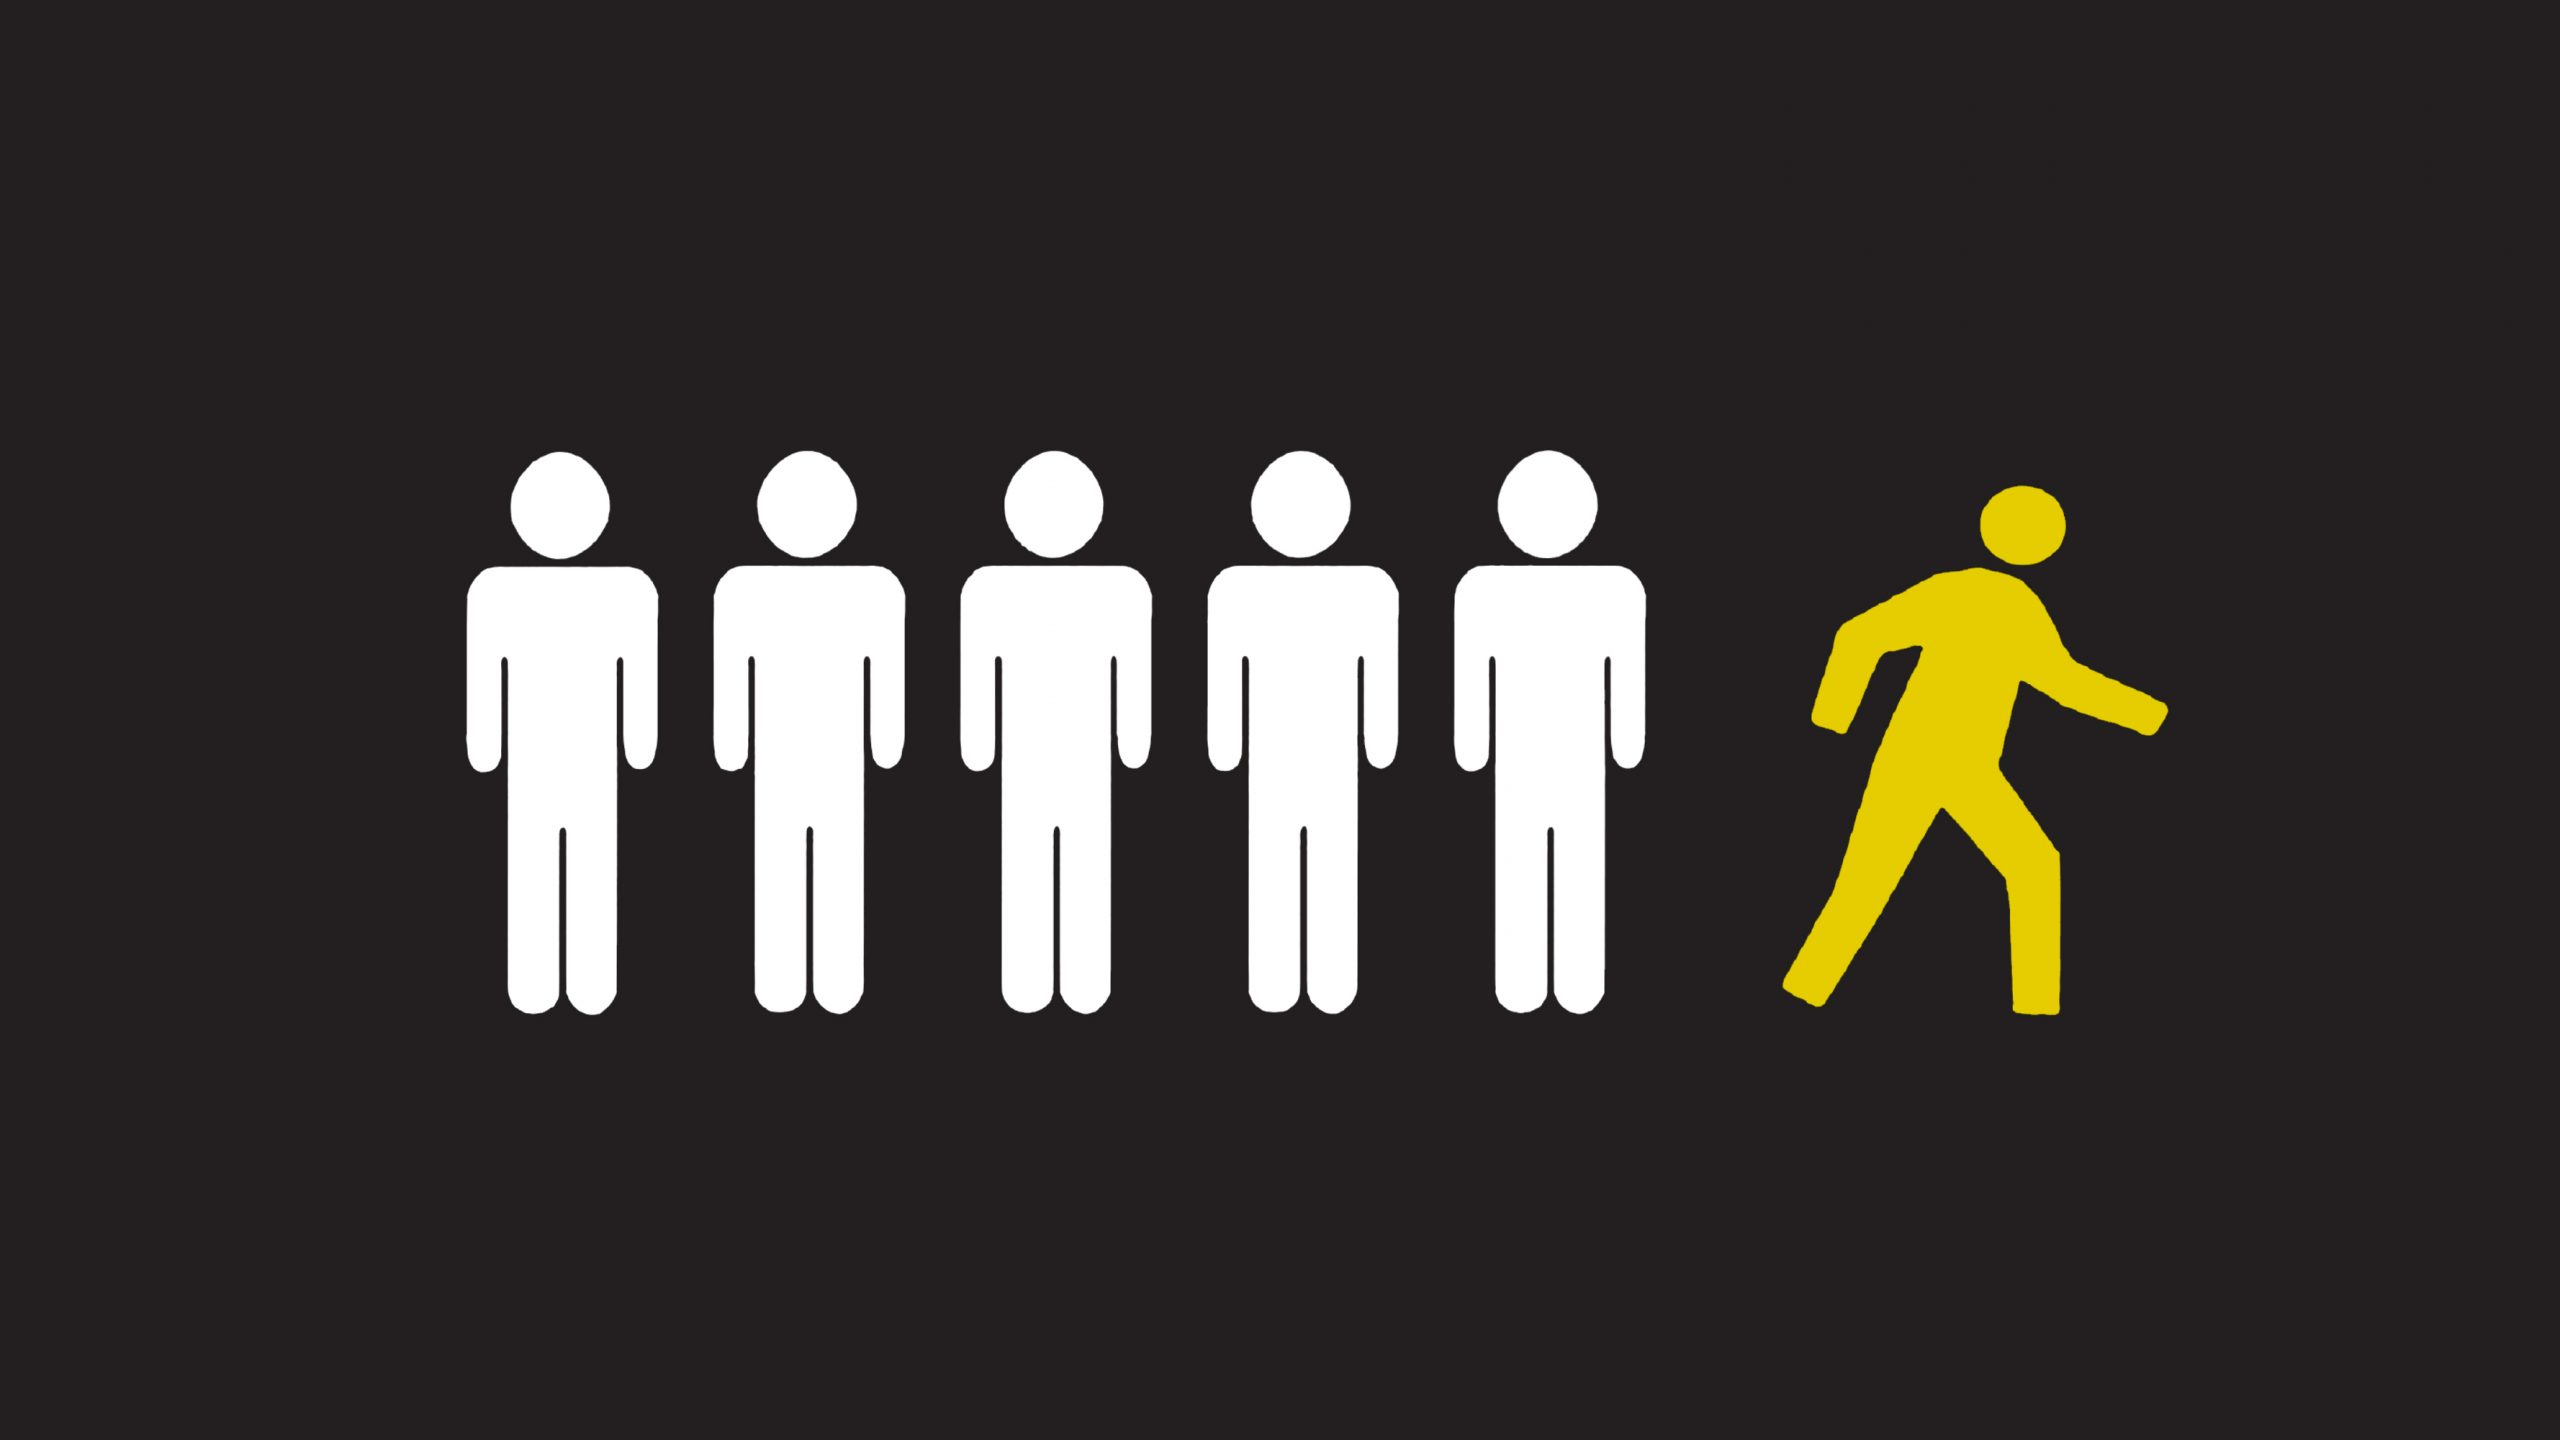
Source: https://www.analyticsvidhya.com/

# **Objective**

The primary aim of this study is to predict accurately whether or not the customer left the bank  based on
the dataset.  In this context, I will try to develop a machine learning model that can predict customers 
who will leave the company.

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# **Load Data**

In [ ]:
df1 = pd.read_csv("../input/churn-predictions-personal/Churn_Predictions.csv")
df = df1.copy()

In [ ]:
df.head()

# 2. UNDERSTANDING THE DATA-SET

# **Data Summary**

This dataset  is obtained from www.kaglle.com. The sample size is 10.000.  In this dataset,
there is one dependent variable (Exited) and eleven independent or predicror variables (Surname, Gender, 
CreditScore , Geography, Age, Tenure , Balance , NumOfProducts , IsActiveMember , HasCrCard, and EstimatedSalary).

The description of  variables in this data as follows:

Dependent Variable

Exited: It indicates whether a person left the bank or not (0=No,1=Yes). That is, 1 indicating the person did 
leave the bank, 0 indicating that they didn't.

Independent Variable

Surname: the surname of a customer

Gender : Female/Male

CreditScore : A credit score (credit rating) indicates the likelihood of customer paying credit back.

Geography : Customer’s location (Germany/France/Spain)

Age 

Tenure : The number of years that the customer has been a client of the bank.

Balance : The amount of money customer has in a bank account.

NumOfProducts : It indicates the number of products that a customer has purchased through the bank 
(for instance, credit card, loan, etc.).

IsActiveMember : Status  of active membership (0=No,1=Yes).

HasCrCard : it indicates whether or not a customer has a credit card (0=No,1=Yes).

EstimatedSalary : Estimated salary

In [ ]:
df.head().T

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe(include=[np.number])

In [ ]:
def load_house_price():
    dataframe = pd.read_csv("../input/churn-predictions-personal/Churn_Predictions.csv")
    return dataframe

The pairplot is visualized by using the seaborn library. Each variable has been compared with another variable.

In [ ]:
sns.pairplot(df[['Age','Balance','CreditScore']])
plt.show()

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In this section, first of all, categorical variables should be determined.
Which variables in the data set are categorical?"

In [ ]:
df.columns

**List of Variable**
"""'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited' """

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))

In [ ]:
cat_cols

In [ ]:
more_cat_cols = [col for col in df.columns if len(df[col].unique()) < 10]
print('New Number of Categorical Variables: ', len(more_cat_cols))
print(more_cat_cols)

**List of Categorical Variable**
"""'Surname', 'Gender', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'"""

**Geography**

In [ ]:
df["Geography"].value_counts()

**Gender**

In [ ]:
df["Gender"].value_counts()

**Number of Products**

In [ ]:
df["NumOfProducts"].value_counts()

**HasCrCard**

In [ ]:
df["HasCrCard"].value_counts()

**IsActiveMember**

In [ ]:
df["IsActiveMember"].value_counts()

# 4. ANALYSIS of NUMERICAL VARIABLE

How many numeric variables are in the data set?

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variables: ', len(num_cols))

What are the names of the numeric variables?

In [ ]:
num_cols

**List of Categorical Variable******
""" 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'"""

**Visualization of numeric variables**

In [ ]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

In [ ]:
hist_for_nums(df, num_cols)

# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

Finding the number of values in the target column

In [ ]:
df["Exited"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Exited"].value_counts(),  labels=['No','Yes'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As seen from the values above, there is an imbalance between the classes of the dependent variable."

# 6. ANALYSIS of NUMERICAL VARIABLE

Correlation Matrix

In [ ]:
df.corr()
a = df.corr()['Exited'].sort_values(ascending=False)
print(a)


Correlation of variables with Heatmap

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

There is no multicollinearity among the independent variables.

# 7. DATA PREPROCESSING & FEATURE ENGINEERING

**6.1. Missing Values**

Checking  missing value

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

There is no missing value in data set.

**Drop Feature**

These features are dropped  since they don't effect the dependent variable.

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

The index has been reorganized.

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.columns

Age variable was assigned as 18-30 = 1, 30-40 = 2, 40-50 = 3, 50-60 = 4, 60-92 = 5.

In [ ]:
df["AgeCat"] = pd.qcut(df["Age"], 5, labels=[1, 2, 3, 4, 5])
df["AgeCat"].value_counts()

Customers in the 18-30 age group leave the bank more than other age groups.

In [ ]:
df.groupby("NumOfProducts")["Exited"].value_counts()

Germans are more likely to leave from the bank than other nations.

In [ ]:
df.groupby("Geography")["Exited"].value_counts()

Female customers are more likely to leave the bank than male.

In [ ]:
df.groupby("Gender")["Exited"].value_counts()

It is assumed that the ratio of customers' salaries to credit scores is related to whether they leave the bank or not.


In [ ]:
df["GelirKrediOrani"] = df["EstimatedSalary"] / df["CreditScore"]

In [ ]:
df['GelirKrediOrani'].corr(df['Exited'])

It is assumed that age-related duration with bank is related to whether they leave the bank or not.


In [ ]:
df["experience"] = df["Tenure"] / df["Age"]

In [ ]:
df["LegalAge"] = df["Age"] - df["Tenure"]

In [ ]:
df.head()

# 8. LABEL ENCODING & ONE-HOT ENCODING

Label encoding was applied to geography categorical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])

One hot encoding was applied to geography categorical variables.

In [ ]:
def one_hot_encoder(dataframe):
    dataframe = pd.get_dummies(dataframe, columns=["Geography"], drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns

df.drop(['Gender','Geography'],axis=1,inplace=True)

In [ ]:
df.head()

Robust Scaler uygulayacağım değişkenleri seçtim.

In [ ]:
df_new = df[["Age","NumOfProducts","EstimatedSalary", "GelirKrediOrani","LegalAge","experience"]]

In [ ]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1

    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [ ]:
for col in df_new:
    df[col] = robust_scaler(df[col])


In [ ]:
hist_for_nums(df, df_new)

# 9. MODELING

In [ ]:
X = df.drop('Exited', axis=1)
y = df[["Exited"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=12345)

# **LightGBM**

**Model**

In [ ]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)

**Validation error, accuracy score, confusion matrix**

In [ ]:
cv_results = cross_val_score(lgbm_model, X_train, y_train, cv = 10, scoring= "accuracy")
print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **Random Forest**

**Model**

In [ ]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

**Validation error, accuracy score, confusion matrix**

In [ ]:
cv_results = cross_val_score(rf_model, X_train, y_train, cv = 10, scoring= "accuracy")
print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **CART**

**Model**

In [ ]:
cart_model = DecisionTreeRegressor(random_state=52).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)

**Validation error, accuracy score, confusion matrix**

In [ ]:
cv_results = cross_val_score(cart_model, X_train, y_train, cv = 10, scoring= "accuracy")
print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **Unbalanced Data Set**

The sample size has been increased since it is an unbalanced data set.

In [ ]:
smt = SMOTE(random_state=12345)
X_res, y_res = smt.fit_sample(X, y)

In [ ]:
X = df.drop('Exited', axis=1)
y = df[["Exited"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.20,random_state=12345)

# **LGBM**

**Model**

In [ ]:
lgbm_model=LGBMClassifier(random_state=12345).fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)

**Validation error, accuracy score, confusion matrix**

In [ ]:
cv_results = cross_val_score(lgbm_model, X_train,y_train, cv = 10, scoring= "accuracy")
print("cross_val_score(train):", cv_results.mean())
cv_results = cross_val_score(lgbm_model, X_test,y_test, cv = 10, scoring= "accuracy")
print("cross_val_score(test):", cv_results.mean())
y_train_pred = lgbm_model.predict(X_train)
print("accuracy_score(train):",accuracy_score(y_train, y_train_pred))
print("accuracy_score(test):",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))